# Contenido
1. [Modelado de series de tiempo](#timeser)
2. [Descomposición de series de tiempo](#desctimeser)


# Modelado de series de tiempo  <a name="timeser"></a>

Se presentaran los fundamentos de la modelización de series temporales. Abarcando los siguientes temas.
* Componentes de las series temporales y cómo separarlos mediante métodos de descomposición. 
* Introduccion del concepto de estacionariedad: por qué es importante, cómo comprobarlo 
* Cómo conseguir la estacionariedad en caso de que la serie original no sea estacionaria.

**Metodos de suavizacion**

Estudio de los enfoques más utilizados en la modelización de series temporales: los métodos de suavización exponencial y los modelos de clase ARIMA. 
Se estudiará cómo ajustar los modelos, evaluar la bondad del ajuste y pronosticar los valores futuros de las series temporales. 


Se presenta un enfoque novedoso para modelar una serie temporal utilizando el modelo aditivo de la biblioteca `Prophet` de Facebook.

**Vista de actividades a realizar**
1. Decomposing time series
2. Decomposing time series using Facebook's `Prophet`
3. Testing for stationarity in time series
4. Correcting for stationarity in time series
5. Modeling time series with exponential smoothing methods
6. Modeling time series with ARIMA class models
7. Forecasting using ARIMA class models

---
1. Descomposición de series de tiempo
2. Descomposición de series de tiempo mediante el biblioteca `Prophet` de Facebook
3. Comprobación de la estacionariedad en las series temporales
4. Corrección de la estacionariedad en las series temporales
5. Modelización de series temporales con métodos de suavización exponencial
6. Modelización de series temporales con modelos de clase ARIMA
7. Previsión con modelos de clase ARIMA

# Descomposición de series de tiempo <a name="desctimeser"></a>
El objetivo de la descomposición de las series de tiempo es aumentar nuestra comprensión de los datos dividiendo las series en múltiples componentes. Proporciona una visión de la complejidad de la modelización y de los enfoques que deben seguirse para captar con precisión cada uno de los componentes.

***Componentes sistematicos y no sistematicos***

Estos componentes pueden dividirse en dos tipos: sistemáticos y no sistemáticos. Los sistemáticos se caracterizan por su coherencia y porque pueden describirse y modelarse. En cambio, los no sistemáticos no pueden modelarse directamente.

In [1]:
# Configuracion del entorno
import warnings
warnings.simplefilter(action="ignore", category="FutureWarning")

In [34]:
# Configuracion de los graficos
import matplotlib.pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100

In [3]:
# Importe de librerias
import pandas
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose


In [4]:
# Descargar los precios del oro de los años 2010 a 2020
df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2000-01-01', 
                end_date='2011-12-31')

## Renombrando columnas y filtro de ultimo dato si hay dos valores
df.rename(columns={'Value': 'price'}, inplace=True)
df = df.resample('M').last()

## Ver informacion de sobre el dataframe y los primeros valores
print(f"Shape of dataframe: {df.shape}")
df.head()


Shape of dataframe: (144, 1)


,price
Date,
2000-01-31,284.31
2000-02-29,299.86
2000-03-31,286.39
2000-04-30,279.69
2000-05-31,275.19


<AxesSubplot:title={'center':'Gold price'}, xlabel='Date'>

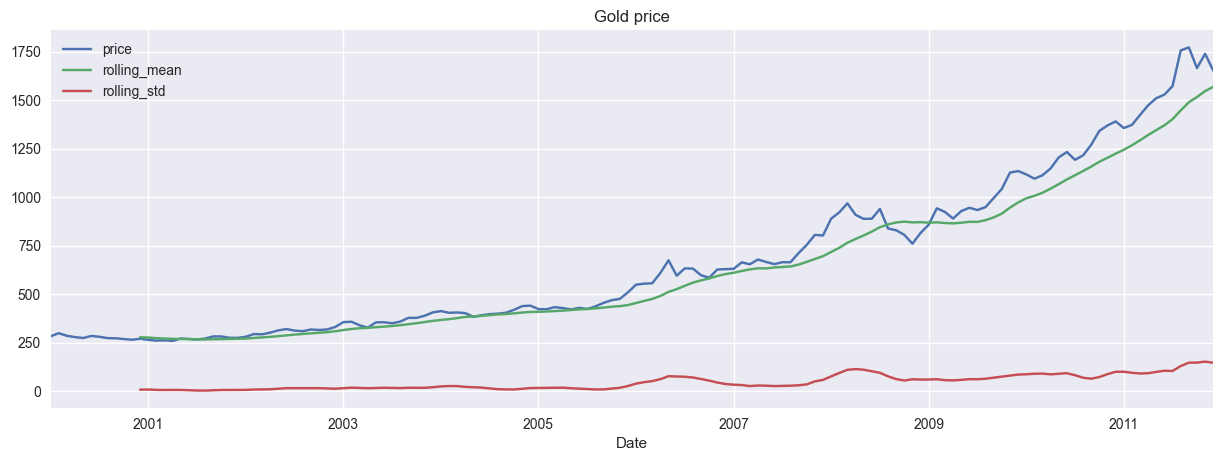

In [35]:
# Añadir media y desviacion estandar
WINDOW_SIZE = 12
df["rolling_mean"] = df.price.rolling(window=WINDOW_SIZE).mean()
df["rolling_std"] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title = "Gold price")
